## Welcome to Exploratory & Sentimental Analysis of Netflix Data 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud as w
from PIL import Image
import plotly as p
import collections




from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


### Rectifying Data by replacing spaces with '_'

In [2]:
netflix_overall=pd.read_csv("netflix-rotten-tomatoes-metacritic-imdb.csv")
netflix_overall.columns = [c.replace(' ', '_') for c in netflix_overall.columns]
netflix_overall.head()

Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2           Centigrade                         Drama, Thriller   
3                ANNE+                                   Drama   
4                Moxie                 Animation, Short, Drama   

                                                Tags         Languages  \
0  Comedy Programmes,Romantic TV Comedies,Horror ...  Swedish, Spanish   
1       Dramas,Comedies,Films Based on Books,British           English   
2                                          Thrillers           English   
3        TV Dramas,Romantic TV Dramas,Dutch TV Shows           Turkish   
4  Social Issue Dramas,Teen Movies,Dramas,Comedie...           English   

  Series_or_Movie  Hidden_Gem_Score  \
0          Series               4.3   
1           Movie               7.0   
2           Movie               6.4   
3          Series               7.7   
4           Movie               8.1   

                                Country_Availability       Runtime  \
0                                           Thailand  < 30 minutes   
1                                             Canada      1-2 hour   
2                                             Canada      1-2 hour   
3                                Belgium,Netherlands  < 30 minutes   
4  Lithuania,Poland,France,Iceland,Italy,Spain,Gr...      1-2 hour   

          Director                      Writer  ... Netflix_Release_Date  \
0  Tomas Alfredson       John Ajvide Lindqvist  ...           2021-03-04   
1    Coky Giedroyc               Caitlin Moran  ...           2021-03-04   
2    Brendan Walsh  Brendan Walsh, Daley Nixon  ...           2021-03-04   
3              NaN                         NaN  ...           2021-03-04   
4    Stephen Irwin                         NaN  ...           2021-03-04   

                         Production_House  \
0               Canal+, Sandrew Metronome   
1  Film 4, Monumental Pictures, Lionsgate   
2                                     NaN   
3                                     NaN   
4                                     NaN   

                             Netflix_Link  \
0  https://www.netflix.com/watch/81415947   
1  https://www.netflix.com/watch/81041267   
2  https://www.netflix.com/watch/81305978   
3  https://www.netflix.com/watch/81336456   
4  https://www.netflix.com/watch/81078393   

                              IMDb_Link  \
0  https://www.imdb.com/title/tt1139797   
1  https://www.imdb.com/title/tt4193072   
2  https://www.imdb.com/title/tt8945942   
3  https://www.imdb.com/title/tt6132758   
4  https://www.imdb.com/title/tt2023611   

                                             Summary  IMDb_Votes  \
0  A med student with a supernatural gift tries t...    205926.0   
1  When nerdy Johanna moves to London, things get...      2838.0   
2  Trapped in a frozen car during a blizzard, a p...      1720.0   
3  Upon moving into a new place, a 20-something r...      1147.0   
4  Inspired by her moms rebellious past and a con...        63.0   

                                               Image  \
0  https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...   
1  https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...   
2  https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...   
3  https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...   
4  https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...   

                                              Poster  \
0  https://m.media-amazon.com/images/M/MV5BOWM4NT...   
1  https://m.media-amazon.com/images/M/MV5BZGUyN2...   
2  https://m.media-amazon.com/images/M/MV5BODM2MD...   
3  https://m.media-amazon.com/images/M/MV5BNWRkMz...   
4  https://m.media-amazon.com/images/M/MV5BODYyNW...   

                                  TMDb_Trailer Trailer_Site  
0                                          NaN          NaN  
1  https://www.youtube.com/watch?v=eIbcxPy4okQ      Yo

In [3]:
netflix_overall.count()

Title                    15480
Genre                    13770
Tags                     15413
Languages                13545
Series_or_Movie          15480
Hidden_Gem_Score         13379
Country_Availability     15461
Runtime                  15479
Director                 10772
Writer                   11150
Actors                   13555
View_Rating               8456
IMDb_Score               13381
Rotten_Tomatoes_Score     6382
Metacritic_Score          4336
Awards_Received           6075
Awards_Nominated_For      7661
Boxoffice                 4007
Release_Date             13373
Netflix_Release_Date     15480
Production_House          5149
Netflix_Link             15480
IMDb_Link                13177
Summary                  15471
IMDb_Votes               13379
Image                    15480
Poster                   11842
TMDb_Trailer              7194
Trailer_Site              7194
dtype: int64

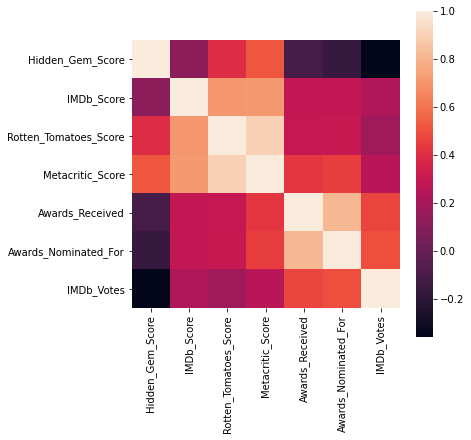

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
corr=netflix_overall.corr()
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr, vmax=1, square=True);

In [5]:
netflix_series=netflix_overall[netflix_overall['Series_or_Movie']=='Series']

netflix_series.head()

Title                                   Genre  \
0              Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
3                         ANNE+                                   Drama   
6                  Gleboka woda                                   Drama   
7                      Instynkt                                   Crime   
23  Girls und Panzer das Finale               Animation, Action, Comedy   

                                                 Tags         Languages  \
0   Comedy Programmes,Romantic TV Comedies,Horror ...  Swedish, Spanish   
3         TV Dramas,Romantic TV Dramas,Dutch TV Shows           Turkish   
6    TV Dramas,Polish TV Shows,Social Issue TV Dramas            Polish   
7           TV Dramas,Crime TV Dramas,Polish TV Shows            Polish   
23  Drama Anime,Action & Adventure,Action Anime,An...          Japanese   

   Series_or_Movie  Hidden_Gem_Score Country_Availability       Runtime  \
0           Series               4.3             Thailand  < 30 minutes   
3           Series               7.7  Belgium,Netherlands  < 30 minutes   
6           Series               8.7               Poland  < 30 minutes   
7           Series               6.9               Poland  < 30 minutes   
23          Series               8.5                Japan  < 30 minutes   

             Director                 Writer  ... Netflix_Release_Date  \
0     Tomas Alfredson  John Ajvide Lindqvist  ...           2021-03-04   
3                 NaN                    NaN  ...           2021-03-04   
6                 NaN                    NaN  ...           2021-03-03   
7                 NaN                    NaN  ...           2021-03-03   
23  Tsutomu Mizushima          Reiko Yoshida  ...           2021-03-02   

             Production_House                            Netflix_Link  \
0   Canal+, Sandrew Metronome  https://www.netflix.com/watch/81415947   
3                         NaN  https://www.netflix.com/watch/81336456   
6                         NaN  https://www.netflix.com/watch/81307527   
7                         NaN  https://www.netflix.com/watch/81307482   
23                        NaN  https://www.netflix.com/watch/81418299   

                               IMDb_Link  \
0   https://www.imdb.com/title/tt1139797   
3   https://www.imdb.com/title/tt6132758   
6   https://www.imdb.com/title/tt2300049   
7   https://www.imdb.com/title/tt1973421   
23  https://www.imdb.com/title/tt7833606   

                                              Summary  IMDb_Votes  \
0   A med student with a supernatural gift tries t...    205926.0   
3   Upon moving into a new place, a 20-something r...      1147.0   
6   A group of social welfare workers led by their...        47.0   
7   An enigmatic commissioner joins the Warsaw Pol...       107.0   
23  The girls on Oarai’s tankery team look forward...       210.0   

                                                Image  \
0   https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...   
3   https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...   
6   https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...   
7   https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...   
23  https://occ-0-993-988.1.nflxso.net/dnm/api/v6/...   

                                               Poster TMDb_Trailer  \
0   https://m.media-amazon.com/images/M/MV5BOWM4NT...          NaN   
3   https://m.media-amazon.com/images/M/MV5BNWRkMz...          NaN   
6   https://m.media-amazon.com/images/M/MV5BMTc0Nz...          NaN   
7   https://m.media-amazon.com/images/M/MV5BZWYyYW...          NaN   
23  https://m.media-amazon.com/images/M/MV5BOGU2OG...          NaN   

   Trailer_Site  
0           NaN  
3           NaN  
6           NaN  
7           NaN  
23          NaN  

[5 rows x 29 columns]

In [15]:
netflix_series['Rotten_Tomatoes_Score']

0        98.0
3         NaN
6         NaN
7         NaN
23        NaN
         ... 
15475     NaN
15476     NaN
15477     NaN
15478     NaN
15479     NaN
Name: Rotten_Tomatoes_Score, Length: 3783, dtype: float64

In [6]:
netflix_movies=netflix_overall[netflix_overall['Series_or_Movie']=='Movie']

netflix_movies.head()

Title                    Genre  \
1  HOW TO BUILD A GIRL                   Comedy   
2           Centigrade          Drama, Thriller   
4                Moxie  Animation, Short, Drama   
5     The Con-Heartist          Comedy, Romance   
8        Only a Mother                    Drama   

                                                Tags Languages  \
1       Dramas,Comedies,Films Based on Books,British   English   
2                                          Thrillers   English   
4  Social Issue Dramas,Teen Movies,Dramas,Comedie...   English   
5  Romantic Comedies,Comedies,Romantic Films,Thai...      Thai   
8  Social Issue Dramas,Dramas,Movies Based on Boo...   Swedish   

  Series_or_Movie  Hidden_Gem_Score  \
1           Movie               7.0   
2           Movie               6.4   
4           Movie               8.1   
5           Movie               8.6   
8           Movie               8.3   

                                Country_Availability   Runtime       Director  \
1                                             Canada  1-2 hour  Coky Giedroyc   
2                                             Canada  1-2 hour  Brendan Walsh   
4  Lithuania,Poland,France,Iceland,Italy,Spain,Gr...  1-2 hour  Stephen Irwin   
5                                           Thailand   > 2 hrs  Mez Tharatorn   
8  Lithuania,Poland,France,Italy,Spain,Greece,Bel...  1-2 hour    Alf Sjöberg   

                                              Writer  ...  \
1                                      Caitlin Moran  ...   
2                         Brendan Walsh, Daley Nixon  ...   
4                                                NaN  ...   
5  Pattaranad Bhiboonsawade, Thodsapon Thiptinnak...  ...   
8                                  Ivar Lo-Johansson  ...   

  Netflix_Release_Date                        Production_House  \
1           2021-03-04  Film 4, Monumental Pictures, Lionsgate   
2           2021-03-04                                     NaN   
4           2021-03-04                                     NaN   
5           2021-03-03                                     NaN   
8           2021-03-03                                     NaN   

                             Netflix_Link  \
1  https://www.netflix.com/watch/81041267   
2  https://www.netflix.com/watch/81305978   
4  https://www.netflix.com/watch/81078393   
5  https://www.netflix.com/watch/81306155   
8  https://www.netflix.com/watch/81382068   

                               IMDb_Link  \
1   https://www.imdb.com/title/tt4193072   
2   https://www.imdb.com/title/tt8945942   
4   https://www.imdb.com/title/tt2023611   
5  https://www.imdb.com/title/tt13393728   
8   https://www.imdb.com/title/tt0041155   

                                             Summary  IMDb_Votes  \
1  When nerdy Johanna moves to London, things get...      2838.0   
2  Trapped in a frozen car during a blizzard, a p...      1720.0   
4  Inspired by her moms rebellious past and a con...        63.0   
5  After her ex-boyfriend cons her out of a large...       131.0   
8  An unhappily married farm worker struggling to...        88.0   

                                               Image  \
1  https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...   
2  https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...   
4  https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...   
5  https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...   
8  https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...   

                                              Poster  \
1  https://m.media-amazon.com/images/M/MV5BZGUyN2...   
2  https://m.media-amazon.com/images/M/MV5BODM2MD...   
4  https://m.media-amazon.com/images/M/MV5BODYyNW...   
5  https://m.media-amazon.com/images/M/MV5BODAzOG...   
8  https://m.media-amazon.com/images/M/MV5BMjVmMz...   

                                  TMDb_Trailer Trailer_Site  
1  https://www.youtube.com/watch?v=eIbcxPy4okQ      YouTube  
2  https://www.youtube.com/watch?v=0RvV7TNUlkQ      YouTube  
4                     

### Counting the Series & Movies

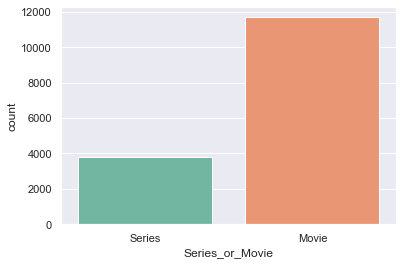

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Series_or_Movie", data=netflix_overall, palette="Set2")

### Displaying titles according to their IMDb scores

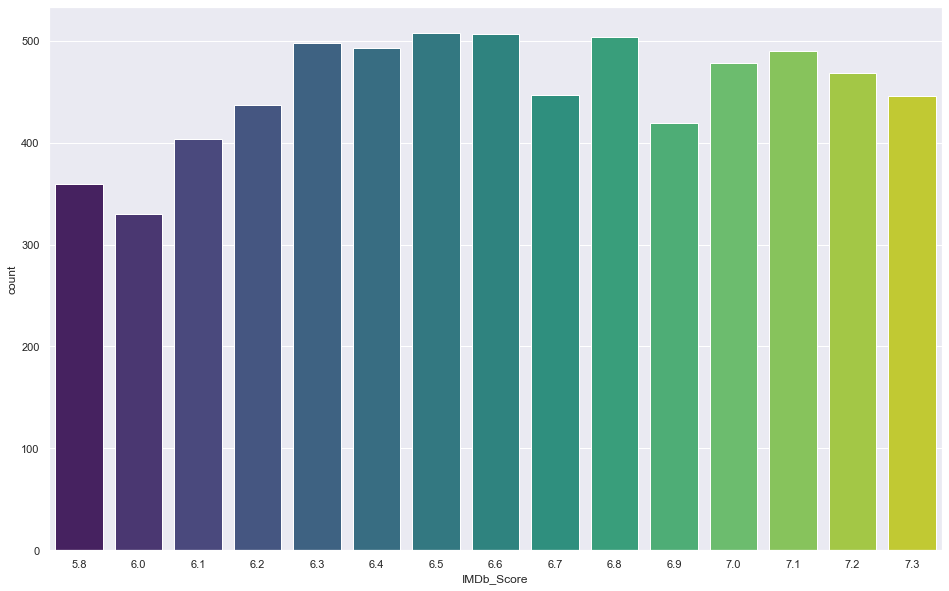

In [8]:
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="IMDb_Score", data=netflix_overall, palette="viridis", order=pd.Float64Index(sorted(netflix_movies['IMDb_Score'].value_counts().index[0:15])))

In [9]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series_or_Movie        15480 non-null  object 
 5   Hidden_Gem_Score       13379 non-null  float64
 6   Country_Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View_Rating            8456 non-null   object 
 12  IMDb_Score             13381 non-null  float64
 13  Rotten_Tomatoes_Score  6382 non-null   float64
 14  Metacritic_Score       4336 non-null   float64
 15  Aw

### Removing non-required features and null value records to proceed with further analysis 

In [10]:
netflix_overall=netflix_overall[['Title','Genre','Languages','Series_or_Movie','Hidden_Gem_Score','Country_Availability','Runtime','Director','Writer','Actors','Release_Date','Summary','IMDb_Votes','IMDb_Score']].dropna()

netflix_overall.head()

Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2           Centigrade                         Drama, Thriller   
5     The Con-Heartist                         Comedy, Romance   
8        Only a Mother                                   Drama   

          Languages Series_or_Movie  Hidden_Gem_Score  \
0  Swedish, Spanish          Series               4.3   
1           English           Movie               7.0   
2           English           Movie               6.4   
5              Thai           Movie               8.6   
8           Swedish           Movie               8.3   

                                Country_Availability       Runtime  \
0                                           Thailand  < 30 minutes   
1                                             Canada      1-2 hour   
2                                             Canada      1-2 hour   
5                                           Thailand       > 2 hrs   
8  Lithuania,Poland,France,Italy,Spain,Greece,Bel...      1-2 hour   

          Director                                             Writer  \
0  Tomas Alfredson                              John Ajvide Lindqvist   
1    Coky Giedroyc                                      Caitlin Moran   
2    Brendan Walsh                         Brendan Walsh, Daley Nixon   
5    Mez Tharatorn  Pattaranad Bhiboonsawade, Thodsapon Thiptinnak...   
8      Alf Sjöberg                                  Ivar Lo-Johansson   

                                              Actors Release_Date  \
0  Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...  12 Dec 2008   
1  Paddy Considine, Cleo, Beanie Feldstein, Dónal...  08 May 2020   
2                  Genesis Rodriguez, Vincent Piazza  28 Aug 2020   
5  Thiti Mahayotaruk, Nadech Kugimiya, Kathaleeya...  03 Dec 2020   
8  Ulf Palme, Ragnar Falck, Hugo Björne, Eva Dahl...  31 Oct 1949   

                                             Summary  IMDb_Votes  IMDb_Score  
0  A med student with a supernatural gift tries t...    205926.0         7.9  
1  When nerdy Johanna moves to London, things get...      2838.0         5.8  
2  Trapped in a frozen car during a blizzard, a p...      1720.0         4.3  
5  After her ex-boyfriend cons her out of a large...       131.0         7.4  
8  An unhappily married farm worker struggling to...        88.0         6.7

### Word cloud representation of Genres

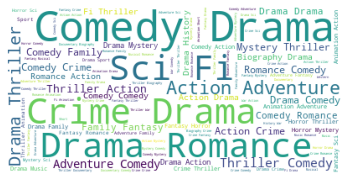

In [11]:
imdb_ratings=netflix_overall.IMDb_Votes
imd_ratings=netflix_overall.Genre
x = pd.concat([imdb_ratings,imd_ratings],axis=1)

wordcloud2 = w.WordCloud(background_color='White').generate(' '.join(x['Genre']))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

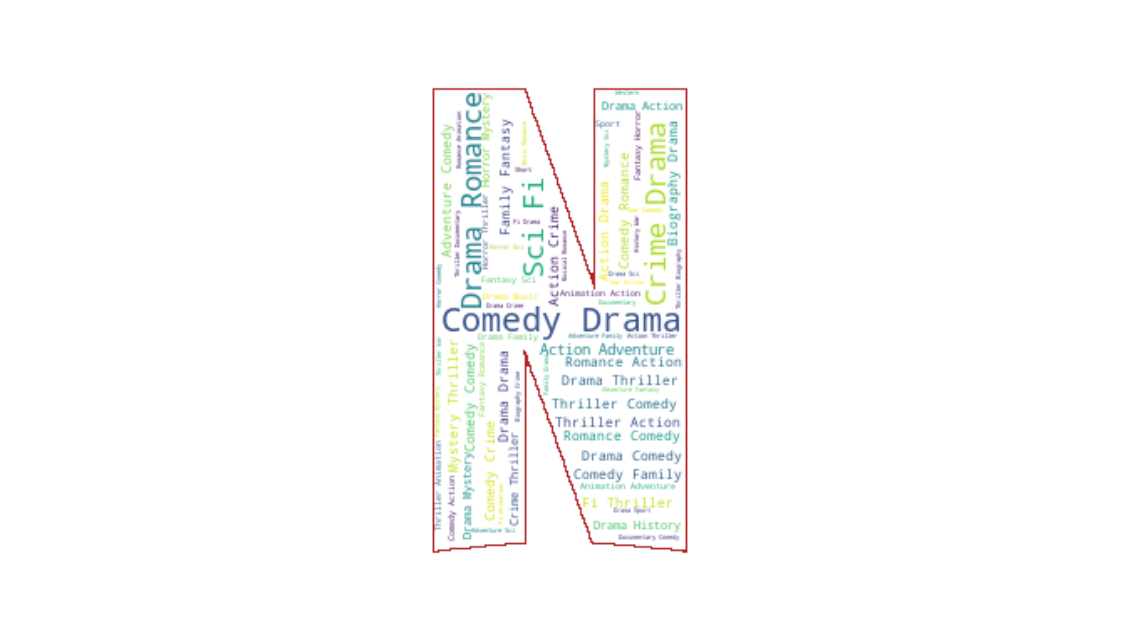

In [12]:
net = np.array(Image.open("n.png"))

net[net==0]=255
wc = w.WordCloud(background_color="white",max_font_size=2000,mask=net, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(' '.join(x['Genre']))

# store to file
#wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
sh=pd.DataFrame(netflix_overall[(netflix_overall.Hidden_Gem_Score.between(4,5,inclusive=True)) & (netflix_overall.IMDb_Score.between(8,10,inclusive=True))])[['Director','Title']].groupby('Director').agg(lambda x: ','.join(x.dropna())).rename(columns={"Title":"SuperHit"})

h=pd.DataFrame(netflix_overall[(netflix_overall.Hidden_Gem_Score.between(3,4,inclusive=True)) & (netflix_overall.IMDb_Score.between(6,8,inclusive=True))])[['Director','Title']].groupby('Director').agg(lambda x: ','.join(x.dropna())).rename(columns={"Title":"Hit"})

av=pd.DataFrame(netflix_overall[(netflix_overall.Hidden_Gem_Score.between(2,3,inclusive=True)) & (netflix_overall.IMDb_Score.between(4,6,inclusive=True))])[['Director','Title']].groupby('Director').agg(lambda x: ','.join(x.dropna())).rename(columns={"Title":"Average"})

f=pd.DataFrame(netflix_overall[(netflix_overall.Hidden_Gem_Score.between(1,2,inclusive=True)) & (netflix_overall.IMDb_Score.between(2,4,inclusive=True))])[['Director','Title']].groupby('Director').agg(lambda x: ','.join(x.dropna())).rename(columns={"Title":"Flop"})


### Displaying Directors with Super Hit, Hit, Average and Flop resultants along with titles

In [21]:
netflix=pd.concat([sh,h,av,f], axis=1, join='outer')

#ne=pd.notnull(netflix['SuperHit'] & netflix['Hit'])
#netflix[ne]

#netflix[netflix[['SuperHit','Hit']].notnull()]

netflix=netflix.reset_index()

netflix.info()

netflix

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Director  1411 non-null   object
 1   SuperHit  151 non-null    object
 2   Hit       1020 non-null   object
 3   Average   446 non-null    object
 4   Flop      31 non-null     object
dtypes: object(5)
memory usage: 55.2+ KB


Director  \
0                      Akira Kurosawa   
1                         Alex Gibney   
2                    Alfred Hitchcock   
3             Amole Gupte, Aamir Khan   
4                Andrew Lau, Alan Mak   
...                               ...   
1406  Tomasz Mandes, Barbara Bialowas   
1407                      Trevor Wall   
1408                      Troy Miller   
1409                         Uwe Boll   
1410                     Victor Salva   

                                               SuperHit  \
0                                              Rashomon   
1     Going Clear: Scientology and the Prison of Belief   
2                                        Rebecca,Psycho   
3                                      Taare Zameen Par   
4                                      Infernal Affairs   
...                                                 ...   
1406                                                NaN   
1407                                                NaN   
1408                                                NaN   
1409                                                NaN   
1410                                                NaN   

                                        Hit Average  \
0                                       NaN     NaN   
1                                       NaN     NaN   
2                                       NaN     NaN   
3                                       NaN     NaN   
4     Infernal Affairs 3,Infernal Affairs 2     NaN   
...                                     ...     ...   
1406                                    NaN     NaN   
1407                                    NaN     NaN   
1408                                    NaN     NaN   
1409                                    NaN     NaN   
1410                                    NaN     NaN   

                                               Flop  
0                                               NaN  
1                                               NaN  
2                                               NaN  
3                                               NaN  
4                                               NaN  
...                                             ...  
1406                                       365 Days  
1407                              Norm of the North  
1408        Dumb and Dumberer: When Harry Met Lloyd  
1409  In the Name of the King: A Dungeon Siege Tale  
1410                             Jeepers Creepers 3  

[1411 rows x 5 columns]

In [34]:
#Displaying only SuperHit titles (IMDb rating above 8, HiddenGem Score above 3)

netflix[['Director','SuperHit']].dropna().head(10)

Director                                           SuperHit
0           Akira Kurosawa                                           Rashomon
1              Alex Gibney  Going Clear: Scientology and the Prison of Belief
2         Alfred Hitchcock                                     Rebecca,Psycho
3  Amole Gupte, Aamir Khan                                   Taare Zameen Par
4     Andrew Lau, Alan Mak                                   Infernal Affairs
5       Andrey Zvyagintsev                                         The Return
6  Aniruddha Roy Chowdhury                                               Pink
7            Anubhav Sinha                                         Article 15
8              Anurag Basu                                             Barfi!
9           Anurag Kashyap  Gangs of Wasseypur: Part 2,Gangs of Wasseypur:...

In [30]:
#Displaying only Hit titles (IMDb rating above 6, HiddenGem Score above 2)

netflix[['Director','Hit']].dropna().head(10)

Director                                                Hit
4   Andrew Lau, Alan Mak              Infernal Affairs 3,Infernal Affairs 2
8            Anurag Basu                                Life in a ... Metro
9         Anurag Kashyap                                   Raman Raghav 2.0
10    Ashutosh Gowariker                                       Jodhaa Akbar
13          Bong Joon Ho                                               Okja
17          Bryan Singer                          Valkyrie,Superman Returns
18        Chan-wook Park  Joint Security Area,Thirst,Sympathy for Mr. Ve...
22        Clint Eastwood  Richard Jewell,The Mule,The Bridges of Madison...
24           Danny Boyle  Yesterday,T2: Trainspotting,Steve Jobs,Sunshin...
25      Darren Aronofsky                                         Mother!,Pi

In [32]:
#Displaying only Average titles (IMDb rating above 4, HiddenGem Score above 1)

netflix[['Director','Average']].dropna().head(10)

Director                               Average
10                Ashutosh Gowariker                          Mohenjo Daro
15                      Brian Taylor                           Mom and Dad
22                    Clint Eastwood                    The 15:17 to Paris
58                  John G. Avildsen                               Rocky V
62                    Jonathan Demme                   Ricki and the Flash
64                      José Padilha                     7 Days in Entebbe
74   Lilly Wachowski, Lana Wachowski         Jupiter Ascending,Speed Racer
80                   Martin Campbell                         Green Lantern
85                     Michel Gondry                      The Green Hornet
108                     Ridley Scott  Exodus: Gods and Kings,The Counselor

In [35]:
#Displaying only Flop titles (IMDb rating above 8, HiddenGem Score above 3)


netflix[['Director','Flop']].dropna().head(10)

Director                                               Flop
136           Tom Hooper                                          Cats,Cats
325          D.J. Caruso                           The Disappointments Room
467          Guy Ritchie                                         Swept Away
516          Jan de Bont                            Speed 2: Cruise Control
694   M. Night Shyamalan                                 The Last Airbender
896     Robert Rodriguez  The Adventures of Sharkboy and Lavagirl,Spy Ki...
1164        Dennis Dugan                                      Jack and Jill
1299      Michael Tiddes                              Fifty Shades of Black
1354    Steven C. Miller                               Escape Plan 2: Hades
1360       Sylvain White                                        Slender Man

In [36]:
ratings = pd.DataFrame({'Title':netflix_overall.Title,
                    'Rating': netflix_overall.IMDb_Votes,
                    'Genre':netflix_overall.Genre})
ratings.drop_duplicates(subset=['Title','Rating'], inplace=True)
ratings.shape

ratings

Title    Rating  \
0                 Lets Fight Ghost  205926.0   
1              HOW TO BUILD A GIRL    2838.0   
2                       Centigrade    1720.0   
5                 The Con-Heartist     131.0   
8                    Only a Mother      88.0   
...                            ...       ...   
15462                      4.3.2.1   10370.0   
15463                           13   40425.0   
15464       District 13: Ultimatum   42967.0   
15465               13 Going on 30  167842.0   
15473  Daniel Arends: Blessuretijd     174.0   

                                        Genre  
0      Crime, Drama, Fantasy, Horror, Romance  
1                                      Comedy  
2                             Drama, Thriller  
5                             Comedy, Romance  
8                                       Drama  
...                                       ...  
15462                         Crime, Thriller  
15463                  Crime, Drama, Thriller  
15464                 Action, Crime, Thriller  
15465                Comedy, Fantasy, Romance  
15473                                  Comedy  

[9505 rows x 3 columns]

### Splitting countries with delimiter ',' and creating a list --> dictionary with all the values

In [37]:
#sh=pd.DataFrame(netflix_overall[(netflix_overall.Hidden_Gem_Score.between(4,5,inclusive=True)) & (netflix_overall.IMDb_Score.between(8,10,inclusive=True))])[['Director','Title']].groupby('Director').agg(lambda x: ','.join(x.dropna())).rename(columns={"Title":"SuperHit"})

x=list(netflix_overall['Country_Availability'])
a=[]
c=[]
for i in range(len(x)):
    c=c+x[i].split(',')

    
countries=list(collections.Counter(c).keys())
mentions=list(collections.Counter(c).values())

mix=dict(zip(countries,mentions))

mix={k: v for k, v in sorted(mix.items(), key=lambda item: item[1])}

mix.keys()

dict_keys(['Portugal', 'Turkey', 'Sweden', 'South Korea', 'Colombia', 'Spain', 'Malaysia', 'Netherlands', 'Israel', 'Brazil', 'Hong Kong', 'Iceland', 'Poland', 'France', 'Argentina', 'Mexico', 'Russia', 'Italy', 'Greece', 'South Africa', 'Lithuania', 'Switzerland', 'United States', 'Belgium', 'India', 'Thailand', 'Germany', 'Singapore', 'Australia', 'Slovakia', 'Romania', 'Japan', 'Canada', 'Hungary', 'United Kingdom', 'Czech Republic'])

### Utilizing above created dictionary for Funnel Plot using plotly 

In [38]:
import plotly.express as p
data = dict(
    country=list(mix.keys()),
   number=list(mix.values()))
fig = p.funnel(data, x='number', y='country')
fig.show()

## Let us map the known countries' (mentioned above) number of Netflix titles in a Geospatial Map

In [39]:
#Utilizing countries dataset consisting of latitude and longitudes of each country.

x=pd.DataFrame({'country':mix.keys(),'count':mix.values()})

df = pd.read_csv("countries.csv")
df2 = pd.merge(x, df, on=["country"])
df2

country  count   latitude   longitude
0         Portugal   2429  39.399872   -8.224454
1           Turkey   2563  38.963745   35.243322
2           Sweden   2565  60.128161   18.643501
3      South Korea   2623  35.907757  127.766922
4         Colombia   2632   4.570868  -74.297333
5            Spain   2661  40.463667   -3.749220
6         Malaysia   2700   4.210484  101.975766
7      Netherlands   2709  52.132633    5.291266
8           Israel   2736  31.046051   34.851612
9           Brazil   2742 -14.235004  -51.925280
10       Hong Kong   2785  22.396428  114.109497
11         Iceland   2796  64.963051  -19.020835
12          Poland   2798  51.919438   19.145136
13          France   2806  46.227638    2.213749
14       Argentina   2823 -38.416097  -63.616672
15          Mexico   2824  23.634501 -102.552784
16          Russia   2837  61.524010  105.318756
17           Italy   2865  41.871940   12.567380
18          Greece   2871  39.074208   21.824312
19    South Africa   2889 -30.559482   22.937506
20       Lithuania   2900  55.169438   23.881275
21     Switzerland   2992  46.818188    8.227512
22   United States   2995  37.090240  -95.712891
23         Belgium   3014  50.503887    4.469936
24           India   3056  20.593684   78.962880
25        Thailand   3057  15.870032  100.992541
26         Germany   3059  51.165691   10.451526
27       Singapore   3070   1.352083  103.819836
28       Australia   3122 -25.274398  133.775136
29        Slovakia   3153  48.669026   19.699024
30         Romania   3206  45.943161   24.966760
31           Japan   3261  36.204824  138.252924
32          Canada   3291  56.130366 -106.346771
33         Hungary   3319  47.162494   19.503304
34  United Kingdom   3410  55.378051   -3.435973
35  Czech Republic   3485  49.817492   15.472962

In [40]:
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

#obtaining continent of a country using pycountry_convert package
def gc(col):
    try:
        cncode =  country_name_to_country_alpha2(col)
    except:
        cncode = 'Unknown' 
    try:
        cncon = country_alpha2_to_continent_code(cncode)
    except:
        cncon = 'Unknown' 
    return (cncode, cncon)

df2['code']=None
for i in range(len(df2)):
    df2.at[i,'code']=gc(df2.at[i,'country'])
    
#traversing the new dataframe
df2

country  count   latitude   longitude      code
0         Portugal   2429  39.399872   -8.224454  (PT, EU)
1           Turkey   2563  38.963745   35.243322  (TR, AS)
2           Sweden   2565  60.128161   18.643501  (SE, EU)
3      South Korea   2623  35.907757  127.766922  (KR, AS)
4         Colombia   2632   4.570868  -74.297333  (CO, SA)
5            Spain   2661  40.463667   -3.749220  (ES, EU)
6         Malaysia   2700   4.210484  101.975766  (MY, AS)
7      Netherlands   2709  52.132633    5.291266  (NL, EU)
8           Israel   2736  31.046051   34.851612  (IL, AS)
9           Brazil   2742 -14.235004  -51.925280  (BR, SA)
10       Hong Kong   2785  22.396428  114.109497  (HK, AS)
11         Iceland   2796  64.963051  -19.020835  (IS, EU)
12          Poland   2798  51.919438   19.145136  (PL, EU)
13          France   2806  46.227638    2.213749  (FR, EU)
14       Argentina   2823 -38.416097  -63.616672  (AR, SA)
15          Mexico   2824  23.634501 -102.552784  (MX, NA)
16          Russia   2837  61.524010  105.318756  (RU, EU)
17           Italy   2865  41.871940   12.567380  (IT, EU)
18          Greece   2871  39.074208   21.824312  (GR, EU)
19    South Africa   2889 -30.559482   22.937506  (ZA, AF)
20       Lithuania   2900  55.169438   23.881275  (LT, EU)
21     Switzerland   2992  46.818188    8.227512  (CH, EU)
22   United States   2995  37.090240  -95.712891  (US, NA)
23         Belgium   3014  50.503887    4.469936  (BE, EU)
24           India   3056  20.593684   78.962880  (IN, AS)
25        Thailand   3057  15.870032  100.992541  (TH, AS)
26         Germany   3059  51.165691   10.451526  (DE, EU)
27       Singapore   3070   1.352083  103.819836  (SG, AS)
28       Australia   3122 -25.274398  133.775136  (AU, OC)
29        Slovakia   3153  48.669026   19.699024  (SK, EU)
30         Romania   3206  45.943161   24.966760  (RO, EU)
31           Japan   3261  36.204824  138.252924  (JP, AS)
32          Canada   3291  56.130366 -106.346771  (CA, NA)
33         Hungary   3319  47.162494   19.503304  (HU, EU)
34  United Kingdom   3410  55.378051   -3.435973  (GB, EU)
35  Czech Republic   3485  49.817492   15.472962  (CZ, EU)

In [41]:
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)


#for each coordinate, create circlemarker of number of Netflix titles
for i in range(len(df2)):
        lat = df2.iloc[i]['latitude']
        long = df2.iloc[i]['longitude']
        radius=5
        popup_text = """Country: {}<br><br>
                    Number of Netflix Titles: {}<br>"""
        popup_text = popup_text.format(df2.iloc[i]['country'],
                                   df2.iloc[i]['count']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#displaying the map
world_map

### SNS countplot based on the release dates provided in the Dataset

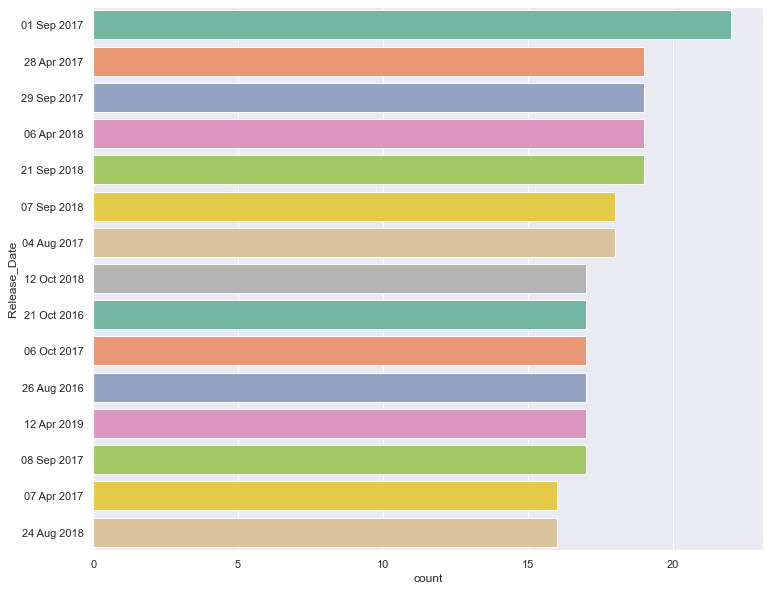

In [23]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="Release_Date", data=netflix_overall, palette="Set2", order=netflix_overall['Release_Date'].value_counts().index[0:15])

Therefore we can state that during September 2017 many titles were released.

### Lollipop plot of Genres vs their count on Netflix

In [24]:
x=list(netflix_overall['Genre'])
a=[]
c=[]
for i in range(len(x)):
    c=c+x[i].split(',')

    
genres=list(collections.Counter(c).keys())
mentions=list(collections.Counter(c).values())

mixg=dict(zip(genres,mentions))

mixg={k: v for k, v in sorted(mixg.items(), key=lambda item: item[1])}

mixg.keys()

dict_keys([' Film-Noir', 'Film-Noir', ' Documentary', ' Reality-TV', 'Reality-TV', 'Adult', 'War', ' Animation', 'Sport', 'History', 'Music', ' News', 'Western', 'Musical', 'Sci-Fi', ' Short', 'Fantasy', 'Mystery', 'Romance', 'Short', 'Family', ' Western', 'Thriller', ' Biography', ' Musical', ' Action', ' Sport', ' Music', ' War', 'Documentary', 'Horror', 'Adventure', ' History', 'Biography', 'Crime', ' Horror', 'Animation', ' Mystery', ' Sci-Fi', ' Family', ' Crime', ' Fantasy', ' Adventure', ' Comedy', ' Romance', 'Action', 'Drama', ' Thriller', 'Comedy', ' Drama'])

<ipython-input-25-792879d82082>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



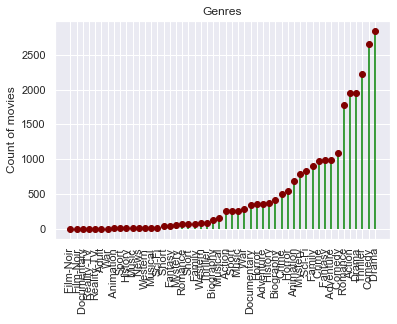

<Figure size 1440x1440 with 0 Axes>

In [25]:
fig, ax = plt.subplots()

fig = plt.figure(figsize = (20, 20))
x=list(mixg.keys())
y=list(mixg.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

## Performing Sentiment Analysis by removing Multi Genre Movies

In [26]:
ns=pd.read_csv('IMDB Dataset.csv')

ns.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

The above output is the dataframe after removing multi-genre movies. Took that step for better sentiment analysis using the Summary.

In [27]:
ns["sentiment"].value_counts()

positive    5028
negative    4973
Name: sentiment, dtype: int64

In [28]:
sl= ns.sentiment.factorize()
sl

(array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [29]:
t = ns.review.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(t)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(t)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [30]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'movie': 15, 'with': 16, 'for': 17, 'but': 18, 'film': 19, 'on': 20, 'you': 21, 'not': 22, 'are': 23, 'his': 24, 'have': 25, 'be': 26, 'one': 27, 'he': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'they': 33, 'so': 34, 'who': 35, 'from': 36, 'like': 37, 'or': 38, 'just': 39, 'her': 40, 'about': 41, 'out': 42, "it's": 43, 'if': 44, 'has': 45, 'there': 46, 'what': 47, 'some': 48, 'good': 49, 'when': 50, 'more': 51, 'very': 52, 'up': 53, 'no': 54, 'would': 55, 'even': 56, 'time': 57, 'my': 58, 'she': 59, 'which': 60, 'story': 61, 'their': 62, 'see': 63, 'only': 64, 'really': 65, 'had': 66, 'can': 67, 'well': 68, 'me': 69, 'were': 70, 'than': 71, 'much': 72, 'get': 73, 'been': 74, 'we': 75, 'bad': 76, 'because': 77, 'will': 78, 'great': 79, 'other': 80, 'into': 81, 'do': 82, 'first': 83, 'people': 84, 'how': 85, 'also': 86, 'most': 87, 'him': 88, "don't":

In [31]:
print(t[0])
print(encoded_docs[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [32]:
print(padded_sequence[0])

[   6 3798    8    1  358  346    4    1  577    7    7    9    6  419
 3003   14   12    6    1  344    5    1 2698 1257    9 2516 1406   20
  529   32 2814    4    1 1228  118   29    1   25 3300    2  382   34
    6   22  304   20    1  529    6  337    5  110 2198    2   51   34
  329    2   23  105  233  240    7    7   10   55  128    1  277 1337
    4    1  112    6  661    5    1  196   12    9  282  118   80  268
  596 2875  823  173 1367 4157   17 2647 1234  823 1308  823  813 3003
  147  939  179    1   83  398   10  124  219 3448   69   14   34 1621
    9   13 2285   10  418  128   10   13 1499   17    9   18   14   10
  284   51   10 1396    3 1217   17 3003    2  191    5    1  304 2265
    4 2215  579   22   39  579   18 4790   26 2672   42   17    3  507
   20  616    2   73  240   16    9   68  684  709  107  643   81 1228
  661    5   62  519    4  965 2178   38 1228  557  144 3003   21  195
  414 3799   16   47    6 3301  829 1760   44   21   67   73    8 1121
   16 

In [33]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           1923328   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 1,939,979
Trainable params: 1,939,979
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
history = model.fit(padded_sequence,sl[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
250/250 [==============================] - 25s 92ms/step - loss: 0.6041 - accuracy: 0.6715 - val_loss: 0.4819 - val_accuracy: 0.8026
Epoch 2/5
250/250 [==============================] - 21s 84ms/step - loss: 0.3880 - accuracy: 0.8390 - val_loss: 0.4511 - val_accuracy: 0.8051
Epoch 3/5
250/250 [==============================] - 21s 85ms/step - loss: 0.2848 - accuracy: 0.8881 - val_loss: 0.3468 - val_accuracy: 0.8581
Epoch 4/5
250/250 [==============================] - 21s 84ms/step - loss: 0.2498 - accuracy: 0.9046 - val_loss: 0.3642 - val_accuracy: 0.8541
Epoch 5/5
250/250 [==============================] - 21s 83ms/step - loss: 0.2036 - accuracy: 0.9246 - val_loss: 0.3415 - val_accuracy: 0.8571


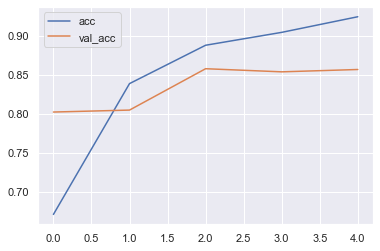

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

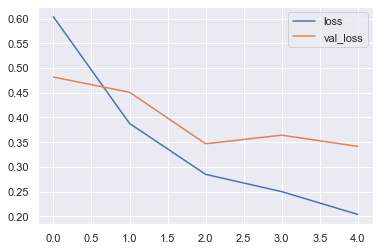

<Figure size 432x288 with 0 Axes>

In [36]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [37]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("\nMovie/Series Sentiment Output: ", sl[1][prediction],"elements present on a higher side.")

#### Choose a flick based on the list of options below.

In [38]:
pd.set_option('display.max_rows', len(netflix_overall))
netflix_overall['Title']

0                                         Lets Fight Ghost
1                                      HOW TO BUILD A GIRL
2                                               Centigrade
5                                         The Con-Heartist
8                                            Only a Mother
9                                               Snowroller
10                                            Sunes Summer
11                                           The Invisible
12                              The Simple Minded Murderer
13                                   The Stig-Helmer Story
14                                         To Kill a Child
15                                                   Joker
16                                                       I
17                                        Harrys Daughters
19                                          False As Water
21                                       A Guest Is Coming
22                                                    19

In [46]:
ui=input('Enter the movie name or its index to obtain Sentiment Analysis of its Summary:\n')
l=list(netflix_overall.index)
s=list(netflix_overall.Title)
newt=netflix_overall.set_index('Title')
try:
    ui=int(ui)
    if ui in l:
        test_sentence2 = netflix_overall.loc[ui,'Summary']
        predict_sentiment(test_sentence2)
        print('\nGenre: ',netflix_overall.loc[ui,'Genre'])
        print('\nSummary: ',netflix_overall.loc[ui,'Summary'])
        pass
    else:
        print("\nThe value is not in the list.")
except ValueError:
    if ui in s:
        test_sentence2 = newt.loc[ui,'Summary']
        predict_sentiment(test_sentence2)
        print('\nGenre: ',newt.loc[ui,'Genre'])
        print('\nSummary: ',newt.loc[ui,'Summary'])
        pass
    else:
        print('\nPlease enter a valid input')

Enter the movie name or its index to obtain Sentiment Analysis of its Summary:
Ong Bak 2: The Beginning

Movie/Series Sentiment Output:  positive elements present on a higher side.

Genre:  Action

Summary:  Tien, the son of Lord Sihadecho -- a murdered nobleman -- is taken under the wing of Chernang, a renowned warrior and leader of the Pha Beek Krut.


In [55]:
pd.DataFrame(newt[newt['Genre']=='Romance'].index)

Title
0                   Romance on the Menu
1                      Hometown Holiday
2               Christmas with a Prince
3                   Walk Away from Love
4               A Wedding for Christmas
5               Christmas Made To Order
6                            The Melody
7                              Kasanova
8                                Mellow
9                 Seni Seviyorum Adamım
10                           Kötü Çocuk
11              Aşk Tesadüfleri Sever 2
12                         Lock-On Love
13                   World Famous Lover
14                       All About Love
15  Love Dot Com: The Social Experiment
16                         French Toast
17                       More than Blue
18       The Guy in the Grave Next Door
19                             The Gift
20                               Isoken
21                            Chocolate
22                               Kochaj
23                        The Day After
24                        Marmalade Boy
25                      Initiation Love
26                                Katie
27                           Sonsuz Aşk
28                      İkimizin Yerine
29             Vince and Kath and James
30                   Always Be My Maybe
31                    Love Off the Cuff
32                       Love by Design
33            Dont Go Breaking My Heart
34          Dont Go Breaking My Heart 2
35            Christmas Wedding Planner
36                     Valentines Again
37                 ​​Kuch Bheege Alfaaz
38         Are You Ready? Hey You Girl!
39                                 Dirt
40                   My Perfect Romance
41                               Kaakan
42                Chadi Jawani Budhe Nu
43                  Brasserie Valentine
44             Scusa ma ti chiamo amore
45                          Bittoo Boss
46          It All Began When I Met You
47                     Usotsuki Paradox
48                     The Stolen Years
49                         Hartenstraat
50                        Piece of Cake
51                              Mirakel
52               The Liar and His Lover
53                      Loves Whirlpool
54         Between Calmness and Passion